In [89]:
import pandas as pd

In [90]:
import warnings

In [91]:
warnings.filterwarnings('ignore')

In [92]:
df = pd.read_csv('./datasets/Car_Purchasing_Data.csv')

In [93]:
df.head()

,Customer Name,Customer e-mail,Country,Gender,Age,Annual Salary,Credit Card Debt,Net Worth,Car Purchase Amount
0,Martina Avila,cubilia.Curae.Phasellus@quisaccumsanconvallis.edu,USA,0,42,62812.09301,11609.380910,238961.2505,35321.45877
1,Harlan Barnes,eu.dolor@diam.co.uk,USA,0,41,66646.89292,9572.957136,530973.9078,45115.52566
2,Naomi Rodriquez,vulputate.mauris.sagittis@ametconsectetueradip...,USA,1,43,53798.55112,11160.355060,638467.1773,42925.70921
3,Jade Cunningham,malesuada@dignissim.com,USA,1,58,79370.03798,14426.164850,548599.0524,67422.36313
4,Cedric Leach,felis.ullamcorper.viverra@egetmollislectus.net,USA,1,57,59729.15130,5358.712177,560304.0671,55915.46248


In [94]:
df.tail()

,Customer Name,Customer e-mail,Country,Gender,Age,Annual Salary,Credit Card Debt,Net Worth,Car Purchase Amount
495,Walter,ligula@Cumsociis.ca,USA,0,41,71942.40291,6995.902524,541670.1016,48901.44342
496,Vanna,Cum.sociis.natoque@Sedmolestie.edu,USA,1,38,56039.49793,12301.456790,360419.0988,31491.41457
497,Pearl,penatibus.et@massanonante.com,USA,1,54,68888.77805,10611.606860,764531.3203,64147.28888
498,Nell,Quisque.varius@arcuVivamussit.net,USA,1,59,49811.99062,14013.034510,337826.6382,45442.15353
499,Marla,Camaron.marla@hotmail.com,USA,1,47,61370.67766,9391.341628,462946.4924,45107.22566


In [95]:
df.shape

(500, 9)

In [96]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Customer Name        500 non-null    object 
 1   Customer e-mail      500 non-null    object 
 2   Country              500 non-null    object 
 3   Gender               500 non-null    int64  
 4   Age                  500 non-null    int64  
 5   Annual Salary        500 non-null    float64
 6   Credit Card Debt     500 non-null    float64
 7   Net Worth            500 non-null    float64
 8   Car Purchase Amount  500 non-null    float64
dtypes: float64(4), int64(2), object(3)
memory usage: 35.3+ KB


In [97]:
df.isnull().sum()

Customer Name          0
Customer e-mail        0
Country                0
Gender                 0
Age                    0
Annual Salary          0
Credit Card Debt       0
Net Worth              0
Car Purchase Amount    0
dtype: int64

In [98]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Gender,500.0,0.506000,0.500465,0.0,0.000000,1.000000,1.000000,1.0
Age,500.0,46.224000,7.990339,20.0,41.000000,46.000000,52.000000,70.0
Annual Salary,500.0,62127.239608,11703.378228,20000.0,54391.977195,62915.497035,70117.862005,100000.0
Credit Card Debt,500.0,9607.645049,3489.187973,100.0,7397.515792,9655.035568,11798.867487,20000.0
Net Worth,500.0,431475.713625,173536.756340,20000.0,299824.195900,426750.120650,557324.478725,1000000.0
Car Purchase Amount,500.0,44209.799218,10773.178744,9000.0,37629.896040,43997.783390,51254.709517,80000.0


In [99]:
import seaborn as sns

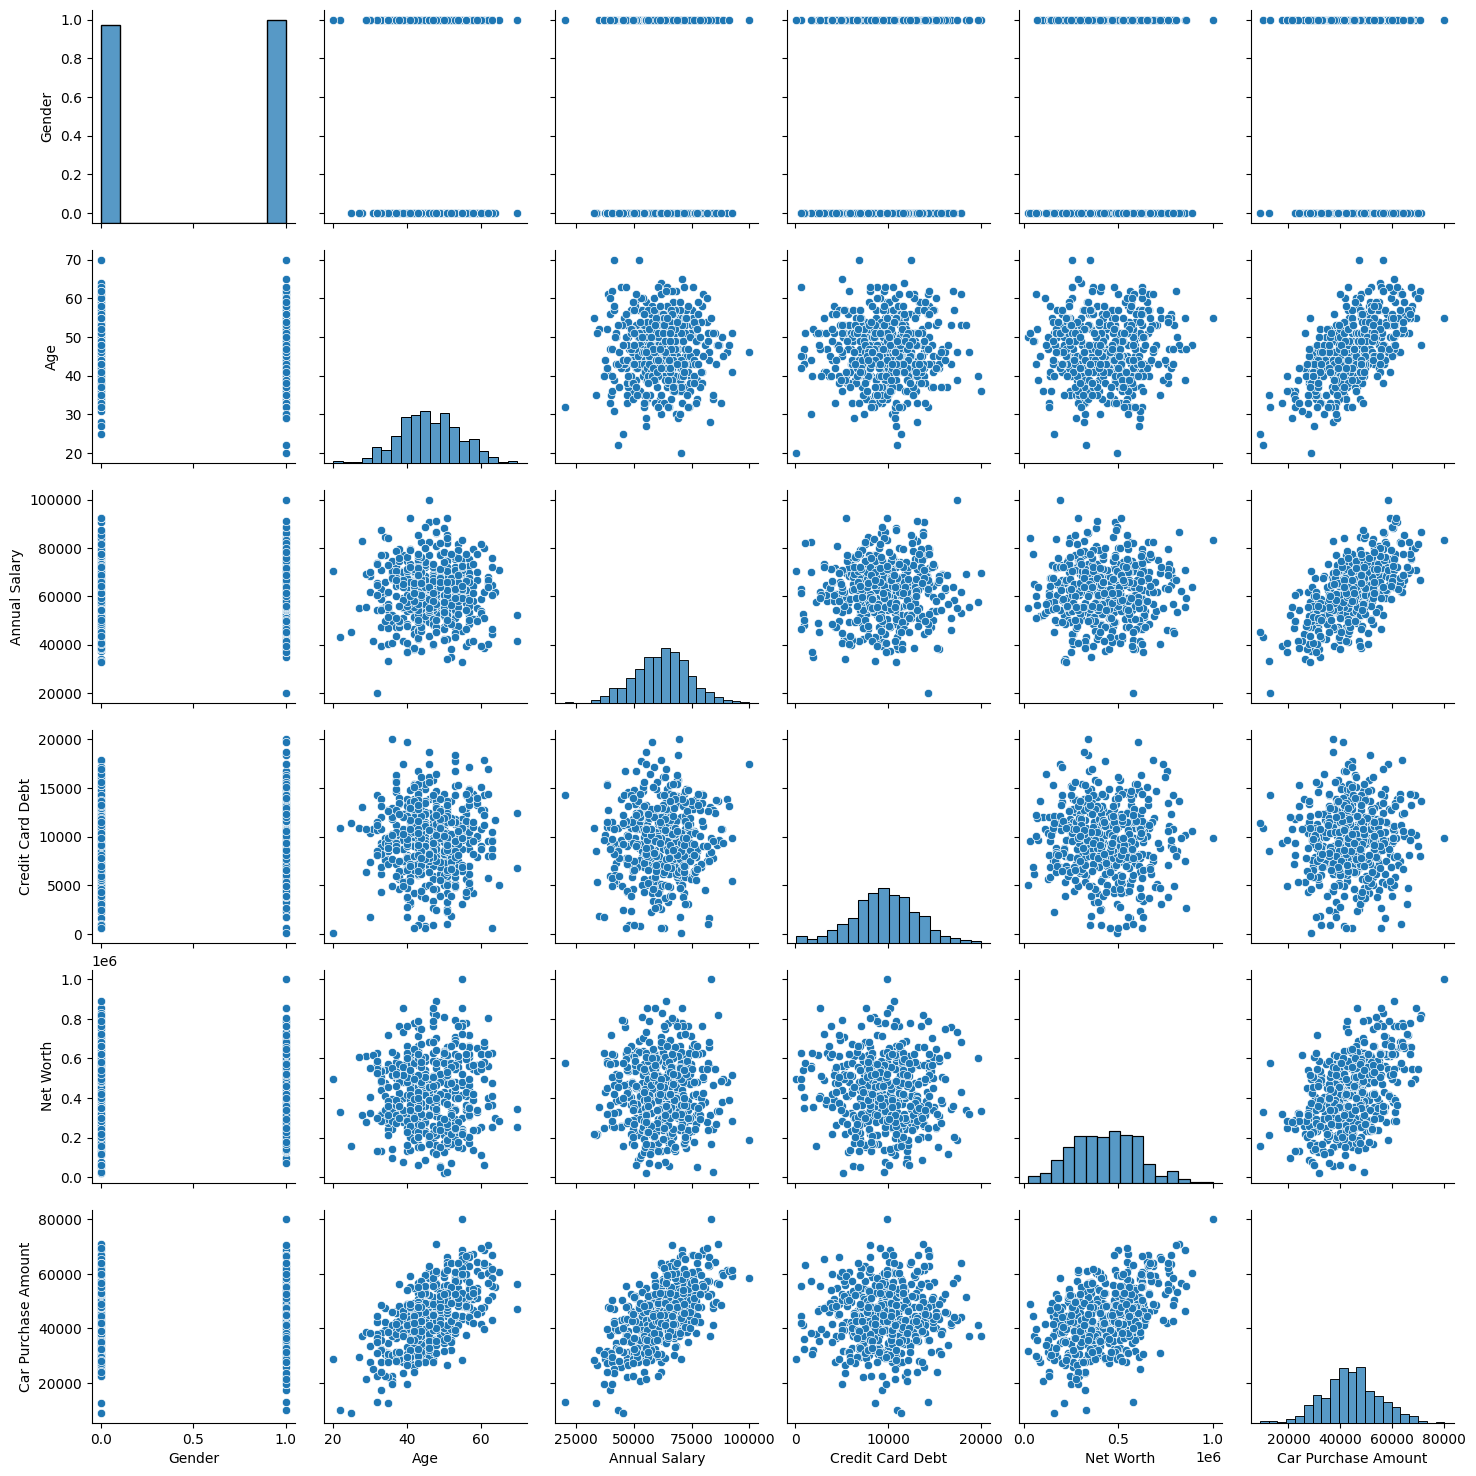

In [100]:
sns.pairplot(df)

<Axes: >

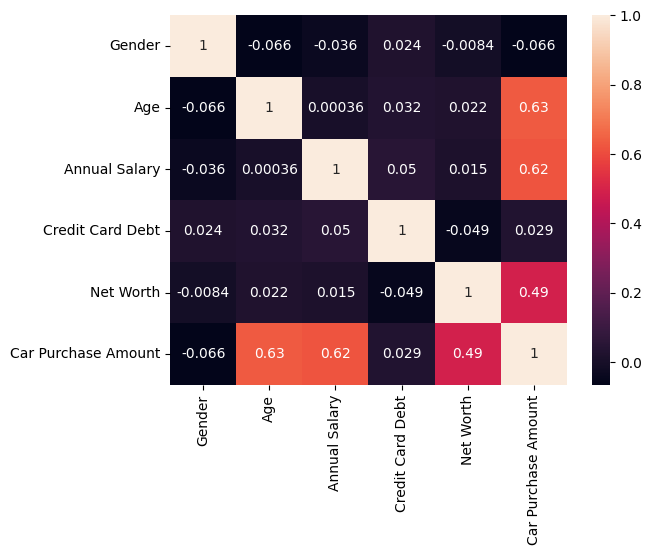

In [101]:
sns.heatmap(df.select_dtypes('number').corr(),annot=True)

In [102]:
df.columns

Index(['Customer Name', 'Customer e-mail', 'Country', 'Gender', 'Age',
       'Annual Salary', 'Credit Card Debt', 'Net Worth',
       'Car Purchase Amount'],
      dtype='object')

In [103]:
X = df.drop(['Customer Name','Customer e-mail','Country', 'Car Purchase Amount'],axis=1)

In [104]:
y=df['Car Purchase Amount']

In [105]:
y

0      35321.45877
1      45115.52566
2      42925.70921
3      67422.36313
4      55915.46248
          ...     
495    48901.44342
496    31491.41457
497    64147.28888
498    45442.15353
499    45107.22566
Name: Car Purchase Amount, Length: 500, dtype: float64

In [106]:
from sklearn.preprocessing import MinMaxScaler

In [107]:
sc = MinMaxScaler()

In [108]:
X_scaled = sc.fit_transform(X)

In [109]:
X_scaled

array([[0.        , 0.44      , 0.53515116, 0.57836085, 0.22342985],
       [0.        , 0.42      , 0.58308616, 0.476028  , 0.52140195],
       [1.        , 0.46      , 0.42248189, 0.55579674, 0.63108896],
       ...,
       [1.        , 0.68      , 0.61110973, 0.52822145, 0.75972584],
       [1.        , 0.78      , 0.37264988, 0.69914746, 0.3243129 ],
       [1.        , 0.54      , 0.51713347, 0.46690159, 0.45198622]],
      shape=(500, 5))

In [110]:
sc1 = MinMaxScaler()

In [111]:
y_reshape = y.values.reshape(-1,1)

In [112]:
y_reshape

array([[35321.45877],
       [45115.52566],
       [42925.70921],
       [67422.36313],
       [55915.46248],
       [56611.99784],
       [28925.70549],
       [47434.98265],
       [48013.6141 ],
       [38189.50601],
       [59045.51309],
       [42288.81046],
       [28700.0334 ],
       [49258.87571],
       [49510.03356],
       [53017.26723],
       [41814.72067],
       [43901.71244],
       [44633.99241],
       [54827.52403],
       [51130.95379],
       [43402.31525],
       [47240.86004],
       [46635.49432],
       [45078.40193],
       [44387.58412],
       [37161.55393],
       [49091.97185],
       [58350.31809],
       [43994.35972],
       [17584.56963],
       [44650.36073],
       [66363.89316],
       [53489.46214],
       [39810.34817],
       [51612.14311],
       [38978.67458],
       [10092.22509],
       [35928.52404],
       [54823.19221],
       [45805.67186],
       [41567.47033],
       [28031.20985],
       [27815.73813],
       [68678.4352 ],
       [68

In [113]:
y_scaled = sc1.fit_transform(y_reshape)

In [114]:
from sklearn.model_selection import train_test_split

In [115]:
X_train, X_test, y_train, y_test=train_test_split(X_scaled,y_scaled,test_size=0.2,random_state=42)

In [116]:
# %pip install xgboost -q

In [117]:
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor

In [118]:
lr = LinearRegression()
lr.fit(X_train,y_train)

svm = SVR()
svm.fit(X_train,y_train)

rf = RandomForestRegressor()
rf.fit(X_train,y_train)

gbr = GradientBoostingRegressor()
gbr.fit(X_train,y_train)

xg = XGBRegressor()
xg.fit(X_train,y_train)


,objective,'reg:squarederror'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,None
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,None


In [119]:
X_train.shape

(400, 5)

In [120]:
# %pip install tensorflow -q

In [121]:
import tensorflow.keras
from keras.models import Sequential
from keras.layers import  Dense

In [122]:
ann = Sequential()

In [123]:
ann.add(Dense(25,input_dim=5,activation='relu'))

In [124]:
ann.add(Dense(25,activation='relu'))

In [125]:
ann.add(Dense(1,activation='linear'))

In [126]:
ann.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_9 (Dense)                 │ (None, 25)             │           150 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 25)             │           650 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 1)              │            26 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 826 (3.23 KB)

 Trainable params: 826 (3.23 KB)

 Non-trainable params: 0 (0.00 B)

In [127]:
ann.compile(optimizer='adam',loss='mean_squared_error')

In [128]:
ann.fit(X_train,y_train,epochs=100,batch_size=50,verbose=1,validation_split=0.2)

Epoch 1/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.4075 - val_loss: 0.2958
Epoch 2/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.2922 - val_loss: 0.2073
Epoch 3/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.2074 - val_loss: 0.1367
Epoch 4/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.1384 - val_loss: 0.0824
Epoch 5/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0864 - val_loss: 0.0451
Epoch 6/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0498 - val_loss: 0.0248
Epoch 7/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0301 - val_loss: 0.0193
Epoch 8/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0223 - val_loss: 0.0210
Epoch 9/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0210 - val_loss: 0.0217
Epoch 10/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0198 - val_loss: 0.0193
Epoch 11/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0175 - val_loss: 0.0158
Epoch 12/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0158 - val_lo

In [129]:
y_pred1 = lr.predict(X_test)
y_pred2 = svm.predict(X_test)
y_pred3 = rf.predict(X_test)
y_pred4 = gbr.predict(X_test)
y_pred5 = xg.predict(X_test)
y_pred6 = ann.predict(X_test)

1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/stepWARNING:tensorflow:6 out of the last 10 calls to <function TensorFlowTrainer.make_predict_function.<locals>.one_step_on_data_distributed at 0x0000017959DDD620> triggered tf.function retracing. Tracing is expensive and the excessive number of tracings could be due to (1) creating @tf.function repeatedly in a loop, (2) passing tensors with different shapes, (3) passing Python objects instead of tensors. For (1), please define your @tf.function outside of the loop. For (2), @tf.function has reduce_retracing=True option that can avoid unnecessary retracing. For (3), please refer to https://www.tensorflow.org/guide/function#controlling_retracing and https://www.tensorflow.org/api_docs/python/tf/function for  more details.
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


In [130]:
from sklearn.metrics import mean_absolute_error, mean_squared_error,r2_score

In [131]:
score1 = r2_score(y_test,y_pred1)
score2 = r2_score(y_test,y_pred2)
score3 = r2_score(y_test,y_pred3)
score4 = r2_score(y_test,y_pred4)
score5 = r2_score(y_test,y_pred5)
score6 = r2_score(y_test,y_pred6)

In [132]:
MAE1 = mean_absolute_error(y_test,y_pred1)
MAE2 = mean_absolute_error(y_test,y_pred2)
MAE3 = mean_absolute_error(y_test,y_pred3)
MAE4 = mean_absolute_error(y_test,y_pred4)
MAE5 = mean_absolute_error(y_test,y_pred5)
MAE6 = mean_absolute_error(y_test,y_pred6)

In [133]:
import numpy as np

In [134]:
RMSE1 = np.sqrt(mean_squared_error(y_test,y_pred1))
RMSE2 = np.sqrt(mean_squared_error(y_test,y_pred2))
RMSE3 = np.sqrt(mean_squared_error(y_test,y_pred3))
RMSE4 = np.sqrt(mean_squared_error(y_test,y_pred4))
RMSE5 = np.sqrt(mean_squared_error(y_test,y_pred5))
RMSE6 = np.sqrt(mean_squared_error(y_test,y_pred6))

In [135]:
final_data = pd.DataFrame({'Models':['LR','SVR','RF','GBR','XG','ANN'],
              'R2_SCORE':[score1,score2,score3,score4,score5,score6],
              "MAE":[RMSE1,RMSE2,RMSE3,RMSE4,RMSE5,RMSE6],
              "RMSE":[RMSE1,RMSE2,RMSE3,RMSE4,RMSE5,RMSE6]})

In [136]:
final_data

,Models,R2_SCORE,MAE,RMSE
0,LR,0.999423,0.003514,0.003514
1,SVR,0.954707,0.031147,0.031147
2,RF,0.948258,0.033290,0.033290
3,GBR,0.974341,0.023443,0.023443
4,XG,0.950578,0.032536,0.032536
5,ANN,0.995267,0.010069,0.010069


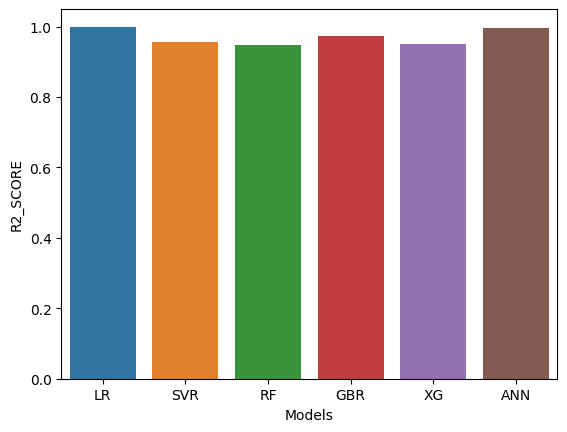

In [137]:
sns.barplot(x= final_data['Models'],y = final_data['R2_SCORE'],data=final_data,hue='Models');

In [138]:
import tensorflow.keras
from keras.models import Sequential
from keras.layers import Dense
ann2 = Sequential()

In [139]:
ann2.add(Dense(25,input_dim=5,activation='relu'))
ann2.add(Dense(25,activation='relu'))
ann2.add(Dense(2,activation='linear'))

In [140]:
ann2.compile(optimizer='adam',loss='mean_squared_error')
ann2.fit(X_scaled,y_scaled,epochs=100,batch_size=50,verbose=1)

Epoch 1/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.4435  
Epoch 2/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.2904 
Epoch 3/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1676 
Epoch 4/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0787 
Epoch 5/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0271 
Epoch 6/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0149 
Epoch 7/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0152 
Epoch 8/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0128 
Epoch 9/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0117 
Epoch 10/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0112 
Epoch 11/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0107 
Epoch 12/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0103 
Epoch 13/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0099 
Epoch 14/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0095 
Epoch 15/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - lo

In [141]:
from joblib import dump, load

In [142]:
dump(ann,'models/ann_car_purchase')

['models/ann_car_purchase']

In [143]:
model=load('models/ann_car_purchase')

In [144]:
import numpy as np

In [145]:
df.head(1)

,Customer Name,Customer e-mail,Country,Gender,Age,Annual Salary,Credit Card Debt,Net Worth,Car Purchase Amount
0,Martina Avila,cubilia.Curae.Phasellus@quisaccumsanconvallis.edu,USA,0,42,62812.09301,11609.38091,238961.2505,35321.45877


In [146]:
X_test1= sc.transform(np.array([[0,42,62812.09301,11609.38091,238961.2505]]))

In [147]:
X_test1

array([[0.        , 0.44      , 0.53515116, 0.57836085, 0.22342985]])

In [148]:
pred = model.predict(X_test1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step


In [149]:
sc1.inverse_transform(pred)

array([[35660.484]], dtype=float32)

In [ ]:
# pred2 = lr.predict(X_test1)
# sc1.inverse_transform(pred2)

array([[35470.7411572]])